In [1]:
import os

In [2]:
os.chdir('../..')

# Data Augmentation

In [3]:
import cv2
import dev.python.utils.data_augmentation as da
import PIL
import PIL.Image as Image
import numpy as np
import random

In [4]:
import imgaug as ia
import imgaug.augmenters as iaa

In [5]:
cover_img_dir = 'data/input/book_covers/'
background_img_dir = 'data/input/shops_atmosphere/'
augmented_img_output_dir = 'data/output/tests/augmented_covers/'

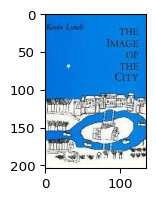

In [6]:
cover_img_cat = os.listdir(cover_img_dir)[0]
cover_img_file = os.listdir(cover_img_dir+cover_img_cat)[0]
cover_img_path = cover_img_dir+cover_img_cat+'/'+cover_img_file
cover_img = cv2.imread(cover_img_path)
ia.imshow(cover_img[:, :, ::-1])

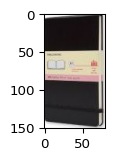

In [7]:
cover_img_cat = os.listdir(cover_img_dir)[0]
cover_img_file = os.listdir(cover_img_dir+cover_img_cat)[0]
cover_img_path = cover_img_dir+cover_img_cat+'/'+'0000004.jpg'
cover_img = cv2.imread(cover_img_path)
ia.imshow(cover_img[:, :, ::-1])

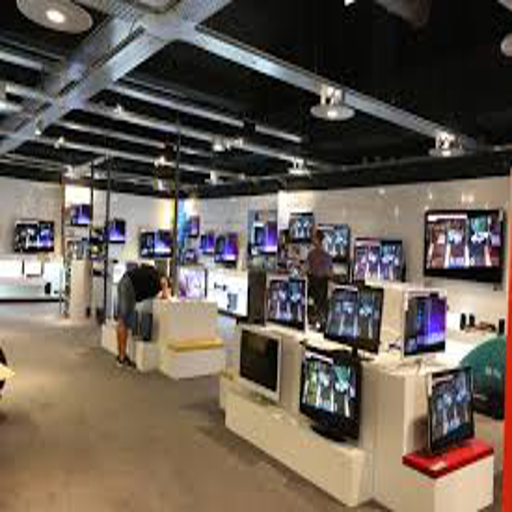

In [8]:
background_img_file = os.listdir(background_img_dir)[3]
background_img_path = background_img_dir+background_img_file
background_img = PIL.Image.open(background_img_path).resize((512,512))
background_img

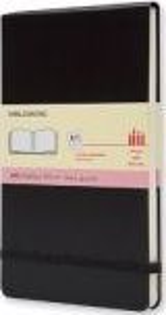

In [54]:
resized_cover_img = da.scale_cover_image(cover_img, background_img)
PIL.Image.fromarray(resized_cover_img[:, :, ::-1])

In [55]:
rotation = (random.uniform(0, 45), random.uniform(0, 45), random.uniform(0, 45))

cover_img_corners = da.get_image_corners(resized_cover_img)

M = da.transform(resized_cover_img,
          translation=(0, 0, 0),
          rotation=rotation,
          scaling=(1, 1, 1),
          shearing=(0, 0, 0))
proj_cover_img_corners = np.array([da.project_point(point, M) for point in cover_img_corners])

rotation, M, proj_cover_img_corners

((35.27144424441636, 28.447888349399168, 33.05033991381849),
 array([[ 2.93774400e+02, -1.33965766e+02,  2.37148043e+04],
        [ 1.71027696e+02,  3.15186643e+02, -1.24758175e+04],
        [ 6.40910308e-01,  2.71911420e-01,  2.31134702e+02]]),
 array([[103, -54],
        [215,  47],
        [-58, 274],
        [ 72, 272],
        [ 83, 157]]))

In [56]:
translation = da.find_translation(proj_cover_img_corners)
translation

array([58, 54])

In [57]:
i=0
while (proj_cover_img_corners<0).any():
    translation += i*10
    M = da.transform(resized_cover_img,
                  translation=(translation[0], translation[1], 0),
                  rotation=rotation,
                  scaling=(1, 1, 1),
                  shearing=(0, 0, 0))
    proj_cover_img_corners = np.array([da.project_point(point, M) for point in cover_img_corners])
    i+=1

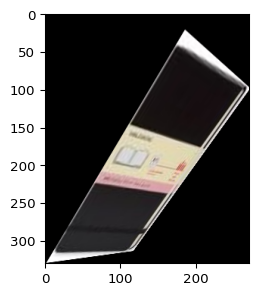

In [58]:
warped_cover_img_size = np.max(proj_cover_img_corners, axis=0)
warped_cover_img = cv2.warpPerspective(resized_cover_img, M, tuple(warped_cover_img_size))
ia.imshow(warped_cover_img[:, :, ::-1])

In [59]:
warped_cover_img_mask = da.create_img_mask(warped_cover_img)
warped_cover_img_mask

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [60]:
center_background_img = (np.array(background_img.size)/2).astype(np.int)

In [61]:
position_cover_img_in_background = da.define_position_of_cover_in_background(proj_cover_img_corners[-1],
background_img)
position_cover_img_in_background

(116, 60)

In [62]:
background_img.paste(Image.fromarray(warped_cover_img[:, :, ::-1]),
position_cover_img_in_background,
Image.fromarray(warped_cover_img_mask))

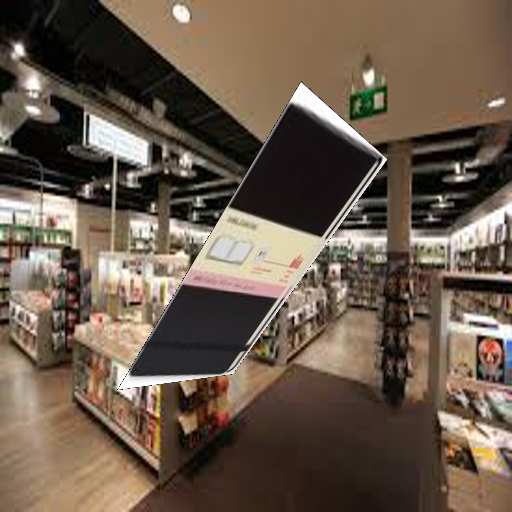

In [63]:
augmented_img = background_img.copy()
augmented_img

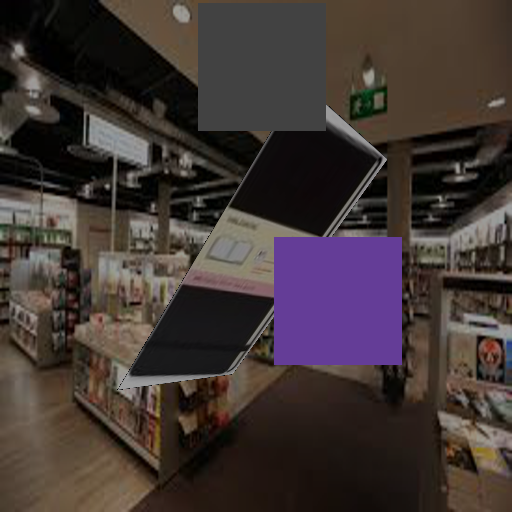

In [64]:
augmented_img_array = da.post_composition_augmentation(np.array(augmented_img))
augmented_img_array

In [65]:
filename = da.generate_file_path_name(cover_img_cat+'_'+cover_img_file.split('.')[0], proj_cover_img_corners[:-1]+position_cover_img_in_background, 0)
augmented_img_output_path = augmented_img_output_dir+filename

In [21]:
augmented_img_output_path

'data/output/tests/augmented_covers/Biography_0000943_0_166_115_355_121_123_361_286_351.jpg'

In [38]:
augmented_img_array.convert('RGB').save(augmented_img_output_path)

In [47]:
with(open('logs/logs.txt', 'a'))as f:
    f.write(cover_img_path+', '+background_img_path+', '+'_'.join([str(angle)for angle in rotation])+'\n')

In [35]:
l = os.listdir(cover_img_dir)
l.remove('main_dataset.csv')
l

['Art-Photography',
 'Biography',
 'Business-Finance-Law',
 'Childrens-Books',
 'Computing',
 'Crafts-Hobbies',
 'Crime-Thriller',
 'Dictionaries-Languages',
 'Entertainment',
 'Food-Drink',
 'Graphic-Novels-Anime-Manga',
 'Health',
 'History-Archaeology',
 'Home-Garden',
 'Humour',
 'Medical',
 'Mind-Body-Spirit',
 'Natural-History',
 'Personal-Development',
 'Poetry-Drama',
 'Reference',
 'Religion',
 'Romance',
 'Science-Fiction-Fantasy-Horror',
 'Science-Geography',
 'Society-Social-Sciences',
 'Sport',
 'Stationery',
 'Teaching-Resources-Education',
 'Technology-Engineering',
 'Teen-Young-Adult',
 'Transport',
 'Travel-Holiday-Guides']

# refacto

In [5]:
import dev.python.utils.data_augmentation as da

In [165]:
from importlib import reload

In [166]:
reload(da)

<module 'dev.python.utils.data_augmentation' from '/home/app/dev/python/utils/data_augmentation.py'>

In [10]:
im, p = da.end_to_end_transformation(cover_img, background_img)
im

In [12]:
p

array([[228,  35],
       [397,  99],
       [119, 410],
       [294, 436]])

In [15]:
background_img_dir = 'data/input/train2017/train2017/'

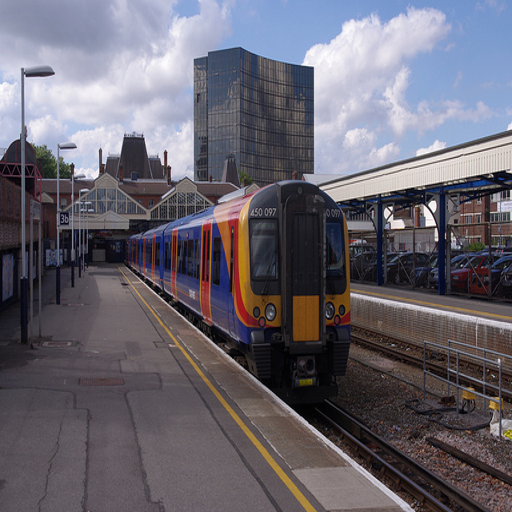

In [16]:
background_img_file = os.listdir(background_img_dir)[3]
background_img_path = background_img_dir+background_img_file
background_img = PIL.Image.open(background_img_path).resize((512,512))
background_img

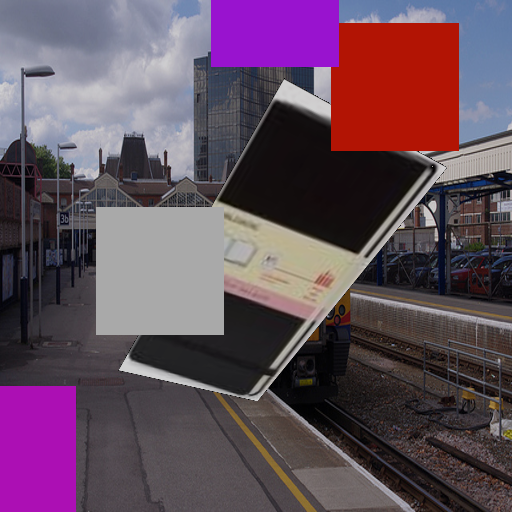

In [17]:
im, p = da.end_to_end_transformation(cover_img, background_img)
im

In [5]:
import dev.python.commands.data_augmentation_pipeline as dap

In [6]:
args = dap.arg_parser(['--cover_input_dir', 'data/input/book_covers/',
                       '--background_input_dir', 'data/input/shops_atmosphere/', 'data/input/train2017/train2017/',
                      '--augmented_image_train_dir', 'data/output/tests/train_set/',
                      '--augmented_image_test_dir', 'data/output/tests/test_set/'])
args.cover_input_dir, args.background_input_dir, args.augmented_image_train_dir, args.augmented_image_test_dir

('data/input/book_covers/',
 ['data/input/shops_atmosphere/', 'data/input/train2017/train2017/'],
 'data/output/tests/train_set/',
 'data/output/tests/test_set/')

In [7]:
nb_file_per_dir = [len(os.listdir(directory)) for directory in args.background_input_dir]
dap.rdm_dir_selection(args.background_input_dir, [sum(nb_file_per_dir[:i+1])/sum(nb_file_per_dir)for i, n in enumerate(nb_file_per_dir)])

(1, 'data/input/train2017/train2017/')

In [8]:
dap.rdm_dir_selection([args.augmented_image_train_dir, args.augmented_image_test_dir], file_distrib=[0.8, 1])

(0, 'data/output/tests/train_set/')

In [ ]:
dap.pipeline(args.cover_input_dir, args.background_input_dir, args.augmented_image_train_dir, args.augmented_image_test_dir)

Art-Photography
Biography


# Données réelles

In [81]:
import json
import numpy as np
import tensorflow as tf
import PIL

In [78]:
def make_dataset(meta_data, data_path = 'data/'):
    def item_gen():
        for f, annotation in zip(meta_data['images'], meta_data['annotations']):
            if len(annotation['segmentation']) > 0:
                  yield {
                    'file_name': data_path + f['file_name'].replace('\\', '/'),
                    'segmentation': annotation['segmentation'][0]
                  }
    def process_item(item):
        return {
            'image': tf.io.decode_image(
                tf.io.read_file(item['file_name']),
                channels=3
            ),
            'segmentation': tf.reshape(item['segmentation'], shape = (4,2))
        }
    return tf.data.Dataset.from_generator(item_gen, output_signature={
        'file_name': tf.TensorSpec(shape=(), dtype = tf.string),
        'segmentation': tf.TensorSpec(shape=(None,), dtype = tf.float32)
    }).map(process_item)

In [82]:
with open('data/input/annotated-book-covers/result.json', 'r') as f:
    meta_data = json.load(f)

In [84]:
ds = make_dataset(meta_data, data_path = 'data/input/annotated-book-covers/')
ds

<MapDataset shapes: {image: <unknown>, segmentation: (4, 2)}, types: {image: tf.uint8, segmentation: tf.float32}>

In [89]:
ds_np = list(ds.as_numpy_iterator())
ds_np

[{'image': array([[[102,  57,  24],
          [102,  57,  24],
          [102,  57,  24],
          ...,
          [  2,   1,   0],
          [  1,   0,   0],
          [  1,   0,   0]],
  
         [[106,  61,  28],
          [106,  61,  28],
          [106,  61,  28],
          ...,
          [  2,   1,   0],
          [  2,   1,   0],
          [  0,   1,   0]],
  
         [[111,  67,  32],
          [111,  67,  32],
          [112,  66,  32],
          ...,
          [  2,   2,   0],
          [  2,   2,   0],
          [  1,   3,   0]],
  
         ...,
  
         [[ 59,  42,  26],
          [ 59,  42,  26],
          [ 59,  42,  26],
          ...,
          [ 19,  18,  16],
          [ 12,  11,   9],
          [  5,   4,   2]],
  
         [[ 59,  42,  26],
          [ 59,  42,  26],
          [ 59,  42,  26],
          ...,
          [ 12,  12,  10],
          [  6,   6,   4],
          [  2,   2,   0]],
  
         [[ 58,  41,  25],
          [ 59,  42,  26],
          [ 59,

In [92]:
ds_np[0]['image'], ds_np[0]['segmentation']

(array([[[102,  57,  24],
         [102,  57,  24],
         [102,  57,  24],
         ...,
         [  2,   1,   0],
         [  1,   0,   0],
         [  1,   0,   0]],
 
        [[106,  61,  28],
         [106,  61,  28],
         [106,  61,  28],
         ...,
         [  2,   1,   0],
         [  2,   1,   0],
         [  0,   1,   0]],
 
        [[111,  67,  32],
         [111,  67,  32],
         [112,  66,  32],
         ...,
         [  2,   2,   0],
         [  2,   2,   0],
         [  1,   3,   0]],
 
        ...,
 
        [[ 59,  42,  26],
         [ 59,  42,  26],
         [ 59,  42,  26],
         ...,
         [ 19,  18,  16],
         [ 12,  11,   9],
         [  5,   4,   2]],
 
        [[ 59,  42,  26],
         [ 59,  42,  26],
         [ 59,  42,  26],
         ...,
         [ 12,  12,  10],
         [  6,   6,   4],
         [  2,   2,   0]],
 
        [[ 58,  41,  25],
         [ 59,  42,  26],
         [ 59,  42,  26],
         ...,
         [ 10,  10,   8],
  

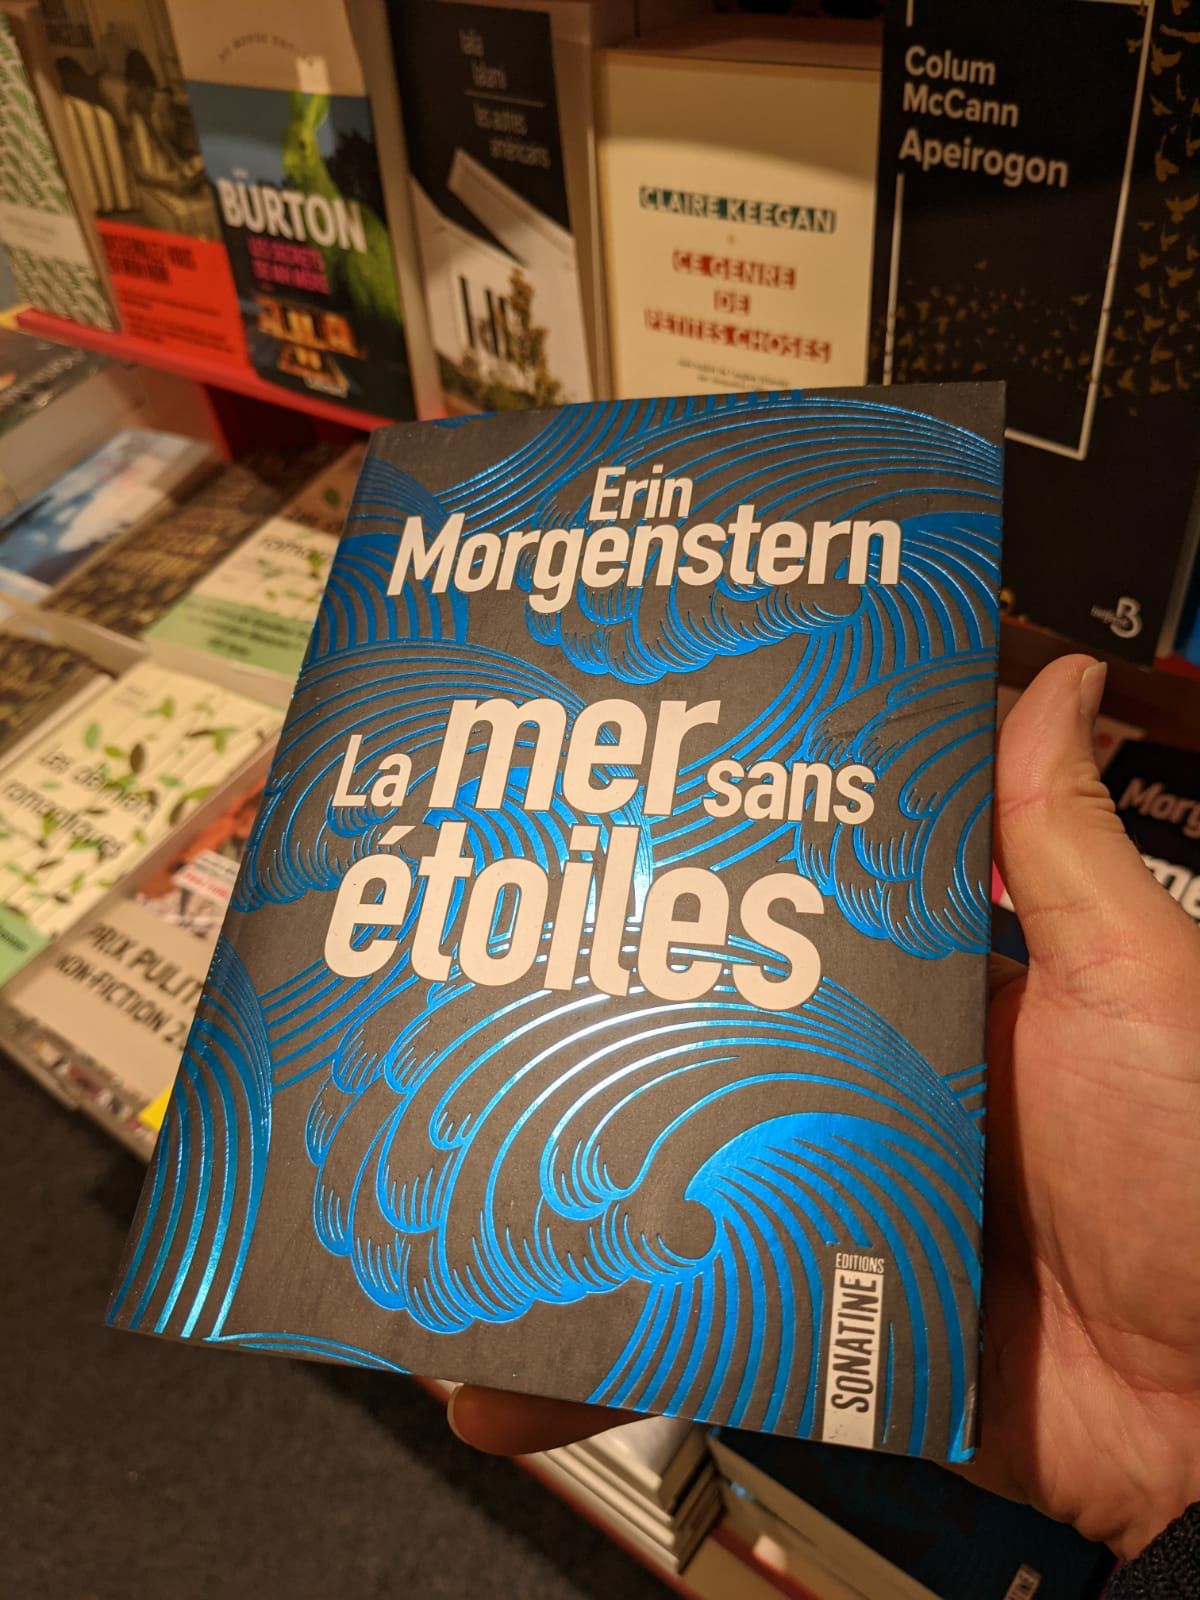

In [99]:
img = PIL.Image.fromarray(ds_np[0]['image'])
img

In [104]:
points = ds_np[0]['segmentation']
points

array([[ 371.2,  422.4],
       [1003.2,  380.8],
       [ 969.6, 1465.6],
       [ 107.2, 1323.2]], dtype=float32)

In [101]:
import dev.python.utils.data_augmentation as da

In [109]:
im_t = PIL.Image.fromarray(ds_np[0]['image'].copy())
im_t.size

(1200, 1600)

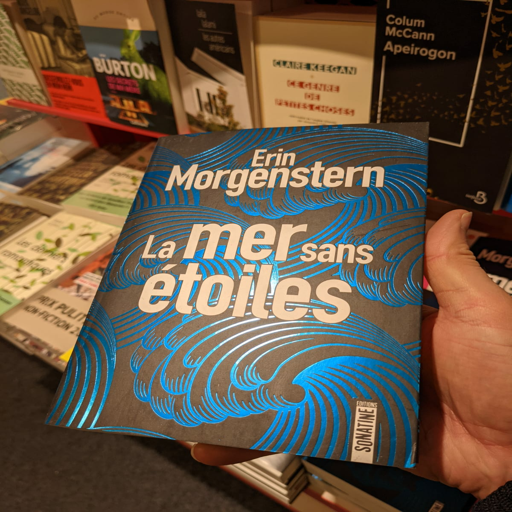

In [112]:
im_t = PIL.Image.fromarray(ds_np[0]['image'].copy())
r_h, r_w = 512/im_t.size[1], 512/im_t.size[0]
im_t = im_t.resize((512, 512))
im_t

In [138]:
scaled_points = np.array(list(zip(points[:, 0]*r_w, points[:, 1]*r_h))).astype(np.int16)
scaled_points

array([[158, 135],
       [428, 121],
       [413, 468],
       [ 45, 423]], dtype=int16)

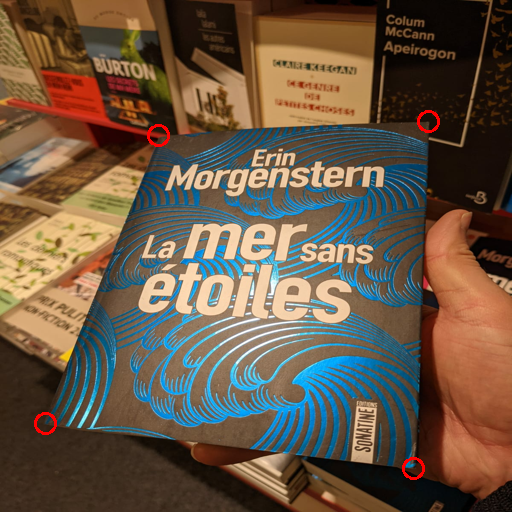

In [139]:
im_t2 = da.draw_circles(np.array(im_t), scaled_points)
PIL.Image.fromarray(im_t2)

In [141]:
i=0
da.generate_file_path_name('Annotated_real_img', scaled_points, i, extension='.jpg')

'annotated_real_img_0_158_135_428_121_413_468_45_423.jpg'

In [142]:
for i, elem in enumerate(ds_np):
    img = PIL.Image.fromarray(elem['image'])
    points = elem['segmentation']
    
    r_h, r_w = 512/img.size[1], 512/img.size[0]
    img = img.resize((512, 512))
    
    scaled_points = np.array(list(zip(points[:, 0]*r_w, points[:, 1]*r_h))).astype(np.int16)
    
    filename = da.generate_file_path_name('Annotated_real_img', scaled_points, i, extension='.jpg')
    img_output_path = 'data/output/tests/annotated_images/'+filename
    
    img.save(img_output_path)

## Augmentation données réelles

In [157]:
import cv2
import dev.python.utils.data_augmentation as da

In [151]:
img_path = 'data/output/tests/annotated_images/'+os.listdir('data/output/tests/annotated_images')[0]
img_path

'data/output/tests/annotated_images/Annotated_real_img_0_158_135_428_121_413_468_45_423.jpg'

In [160]:
img, points = da.read_augmented_img_filename(img_path)
img, points

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7FA2E03D5048>,
 array([[158, 135],
        [428, 121],
        [413, 468],
        [ 45, 423]]))

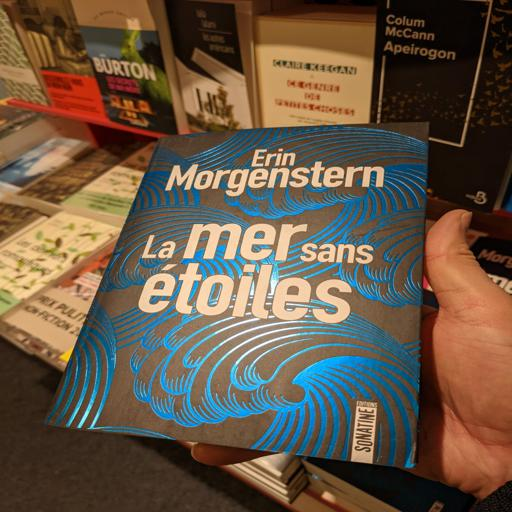

In [161]:
img = PIL.Image.fromarray(img_array[:, :, ::-1])
img

In [175]:
img_array = np.array(img)
img_array.shape

(512, 512, 3)

In [162]:
rotation = (random.uniform(0, 45), random.uniform(0, 45), random.uniform(0, 45))
rotation

(23.049259086976676, 20.179889361092435, 41.81306281479045)

In [195]:
rotation = (0, 0, -25)

In [196]:
M = da.gen_transformation_matrix(np.array(img),
			  translation=(0, 0, 0),
			  rotation=rotation,
			  scaling=(1, 1, 1),
			  shearing=(0, 0, 0))
proj_cover_img_corners = np.array([da.project_point(point, M) for point in points])
proj_cover_img_corners

array([[116, 188],
       [355,  61],
       [488, 382],
       [135, 497]])

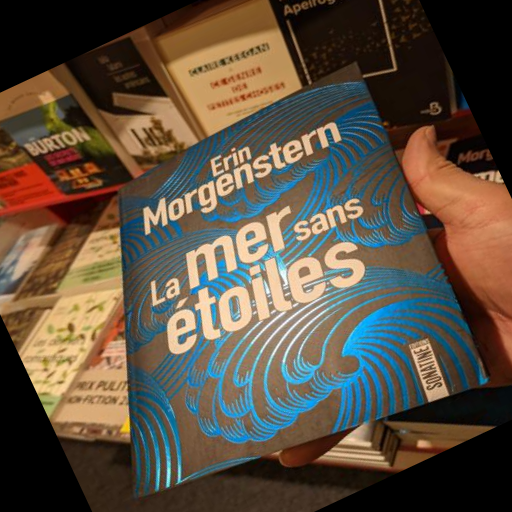

In [197]:
warped_cover_img = cv2.warpPerspective(img_array, M, (512,512))
PIL.Image.fromarray(warped_cover_img)

In [183]:
translation = da.find_translation(proj_cover_img_corners)
translation

array([47,  0])

In [185]:
M = da.gen_transformation_matrix(img_array,
					  translation=(translation[0], translation[1], 0),
					  rotation=rotation,
					  scaling=(1, 1, 1),
					  shearing=(0, 0, 0))
proj_cover_img_corners = np.array([da.project_point(point, M) for point in points])
proj_cover_img_corners

array([[316,  94],
       [477, 241],
       [276, 464],
       [  9, 281]])

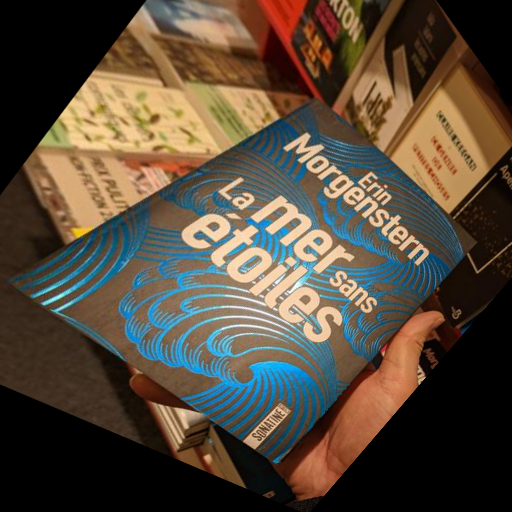

In [186]:
warped_cover_img = cv2.warpPerspective(img_array, M, (512,512))
PIL.Image.fromarray(warped_cover_img)

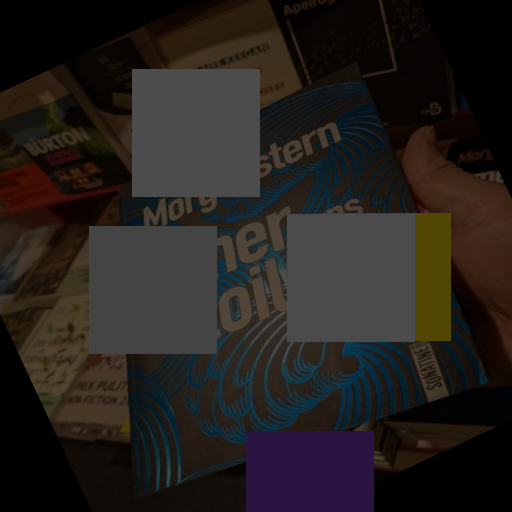

In [198]:
da.post_composition_augmentation(np.array(warped_cover_img))

In [207]:
for j, img_file in enumerate(os.listdir('data/output/tests/annotated_images')):
    img_path = 'data/output/tests/annotated_images/'+img_file
    img, points = da.read_augmented_img_filename(img_path)
    img_array = np.array(img)
    
    for i in range(1000):
        rotation = (random.uniform(-45, 45), random.uniform(-45, 45), random.uniform(-45, 45))
        M = da.gen_transformation_matrix(np.array(img),
                    translation=(0, 0, 0),
                    rotation=rotation,
                    scaling=(1, 1, 1),
                    shearing=(0, 0, 0))
        proj_cover_img_corners = np.array([da.project_point(point, M) for point in points])
        
        translation = da.find_translation(proj_cover_img_corners)
        M = da.gen_transformation_matrix(img_array,
                    translation=(translation[0], translation[1], 0),
                    rotation=rotation,
                    scaling=(1, 1, 1),
                    shearing=(0, 0, 0))
        proj_cover_img_corners = np.array([da.project_point(point, M) for point in points])
        
        warped_img = cv2.warpPerspective(img_array, M, (512,512))
        augmented_img = PIL.Image.fromarray(warped_img)
        
        if 500<random.uniform(0, 1000):
            augmented_img = da.post_composition_augmentation(np.array(augmented_img))
        
        filename = da.generate_file_path_name('Annotated_real_img_%i'%j, proj_cover_img_corners, i, extension='.jpg')
        if random.uniform(0, 1000)<800:
            img_output_path = 'data/output/tests/annotated_images_train/'+filename
        else:
            img_output_path = 'data/output/tests/annotated_images_test/'+filename
        
        augmented_img.save(img_output_path)